In [1]:
# macro do ipython para rederizar o matplotlib inline
%matplotlib inline

# numpy é uma biblioteca de python que 
# nos permite fazer operações matriciais e vetoriais
# facilmente, e eficientemente (até um certo tamanho)
import numpy as np

import matplotlib.pyplot as plt

## Objetivo

O objetivo desse jupyter notebook é complementar a aula teórica com uma perspectiva prática do perceptron.
Vamos mostrar o passo a passo do funcionamento do perceptron e sua simples implementação.

### Exemplo: NAND

Vamos utilizar o mesmo exemplo dado em sala. O exemplo do operador lógico NAND. 

(-0.05, 1.05)

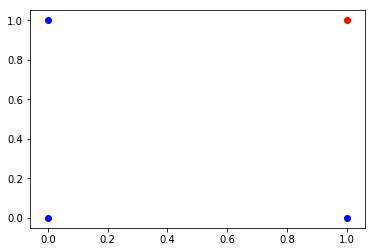

In [73]:
X = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]])

y = np.array([1, 1, 1, 0])

pos = (y == 1)

plt.scatter(X[pos, 0], X[pos, 1], color='b')
plt.scatter(X[~pos, 0], X[~pos, 1], color='r')
axes = plt.gca()
axes.set_ylim(-0.05, 1.05)

Vamos criar nossa classe para implementação do perceptron.

In [3]:
class Perceptron(object):
    def __init__(self):
        self.w_ = None
    
    def ajustar(self, X, y):
        # implementamos o algoritmo de aprendizdo do Perceptron aqui
        return self
        
    def predizer(self, X):
        # retorna zero 1 se positivo e zero se negativo
        return (np.sign(np.dot(X, w)) > 0).astype(int)

Antes de implementarmos o código, vamos recapitular o pseudo-código do algoritmo de aprendizado do perceptron.

1. Inicialize os pesos aleatoriamente
2. Enquanto erro for diferente de zero
    3. Para cada exemplo $(X_i, y_i)$
        3. $\hat y_i \gets sign(W^T \cdotp X_i)$
        4. $w \gets w + (y_i - \hat y_i) \times X_i$
        
        
Vamos transcrevê-lo para python

In [85]:
def plt_perceptron_df(X, y, w):
    xx = np.linspace(0, 1)
    yy = (- w[1] / w[2]) * xx - (w[0] / w[2])
    plt.plot(xx, yy, color='y')
    plt.scatter(X[pos, 1], X[pos, 2], color='b')
    plt.scatter(X[~pos, 1], X[~pos, 2], color='r')
    return plt

class Perceptron(object):
    def __init__(self, max_iter = 100, verbose = 0, random_state = None):
        self.w_ = None
        self.max_iter = max_iter
        self.verbose = verbose
        self.random_state = random_state
    
    def ajustar(self, X, y):
        n_exemplos, n_atributos = X.shape
        
        if y.ndim == 1:
            y = y[:, np.newaxis]
        
        # expandimos X para ascrecentando uma coluna de 1's
        # para o w_0 que representa onde o hiperplano
        # corta o eixo y
        X = np.hstack((np.ones((n_exemplos, 1)), X))
        
        # atribuindo a semente para o gerador de numeros aleatórios
        # para fins de replicabilidade
        np.random.seed(self.random_state)
        
        # inicialize os pesos aleatoriamente
        # note que é importante que os pesos
        # sejam números próximo de zero
        self.w_ = 0.5 * np.random.randn(n_atributos + 1)
        self.w_ = self.w_[:, np.newaxis]

        j = 0
        # predição para todos os Xs
        # de acordo com o w atual
        y_pred = self.predizer(X)
        # enquanto erro for maior que zero
        # adicionamos uma outra codição de parada, apenas
        # para garantir que pare, já que o algoritmo pode não 
        # convergir quando o conjuntos de dados não e linearmente separável
        while(((y_pred != y).mean() > 0) and j < self.max_iter):
            if self.verbose > 0:
                print("(Iter % d) Erro no treino: %.2f" % (j + 1, (y_pred != y).mean()))
                
            # para cada exemplo vamos atualizar os pesos
            for i in range(X.shape[0]):
                self.w_ += ((y[i] - y_pred[i]) * X[i])[:, np.newaxis]
                
                if self.verbose > 5:
                    # traça o gráfico para atualização do peso
                    # é um gráfico 2d, logo vai ser mais preciso para
                    # dados com esse número de dimensões
                    plt = plt_perceptron_df(X, y, self.w_)
                    plt.show()
            
            j += 1
            # predição para todos os Xs
            # de acordo com o w atual
            y_pred = self.predizer(X)
        
        if self.verbose > 0:
                print("Erro no treino: %.2f" % ((y_pred != y).mean()))
                print("Número de iterações: %d" % j)
        
        return self
        
    def predizer(self, X):
        if self.w_ is None:
            raise ValueError('Tentando predizer sem ajustar aos dados!!!') 
            
        # retorna zero 1 se positivo e zero se negativo
        return (np.sign(np.dot(X, self.w_)) > 0).astype(int)

In [83]:
perce = Perceptron(verbose=1, random_state=0)
perce.ajustar(X, y)

(Iter  1) Erro no treino: 0.25
(Iter  2) Erro no treino: 0.75
(Iter  3) Erro no treino: 0.25
(Iter  4) Erro no treino: 0.25
(Iter  5) Erro no treino: 0.50
(Iter  6) Erro no treino: 0.25
Erro no treino: 0.00
Número de iterações: 6


(Iter  1) Erro no treino: 0.25


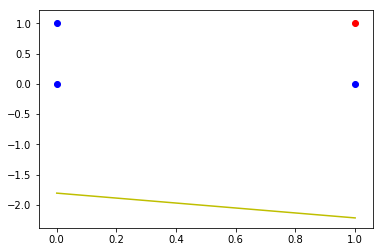

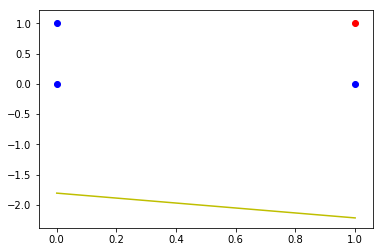

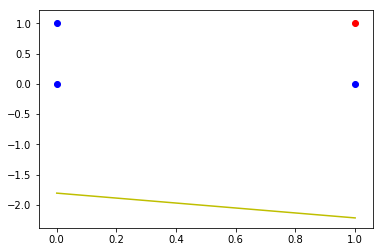

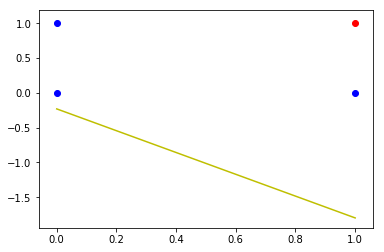

(Iter  2) Erro no treino: 0.75


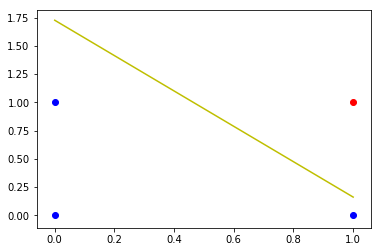

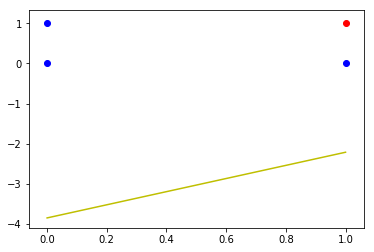

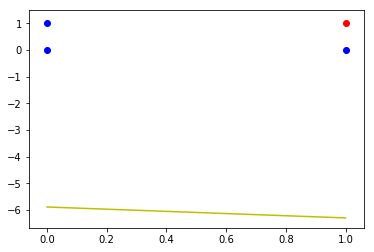

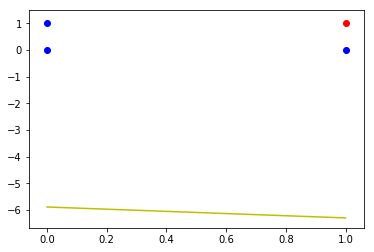

(Iter  3) Erro no treino: 0.25


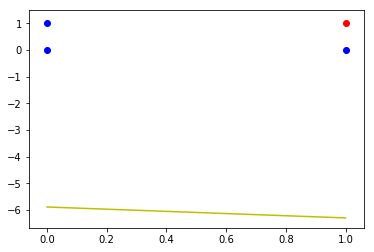

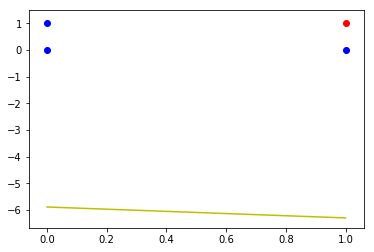

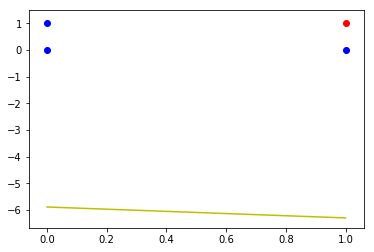

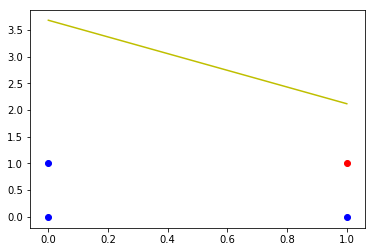

(Iter  4) Erro no treino: 0.25


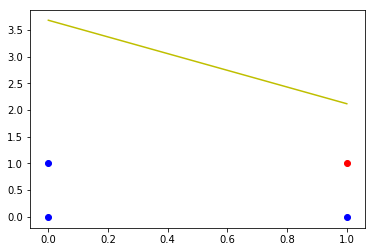

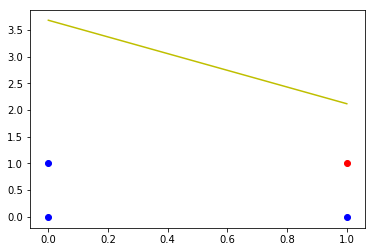

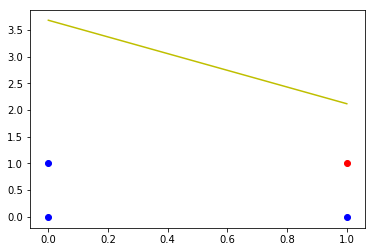

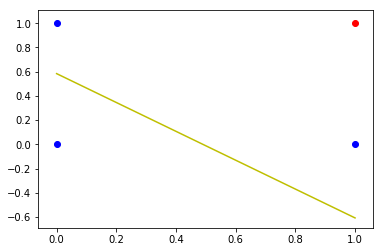

(Iter  5) Erro no treino: 0.50


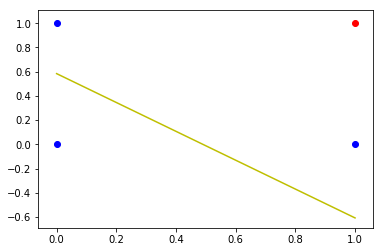

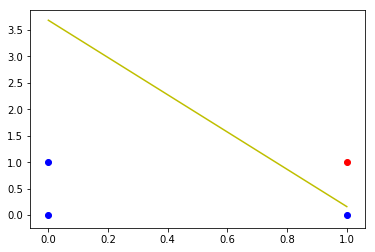

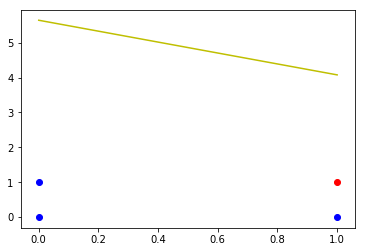

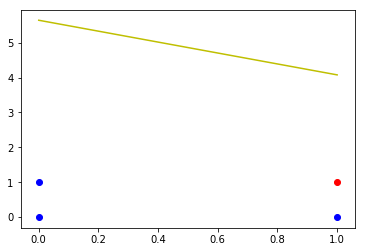

(Iter  6) Erro no treino: 0.25


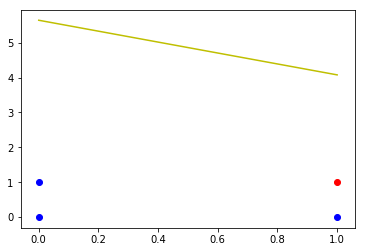

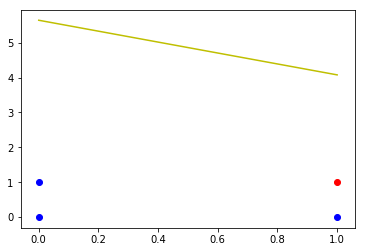

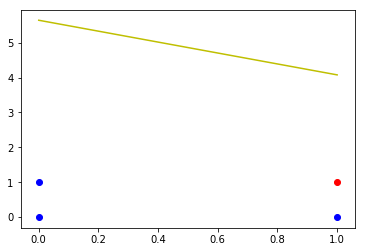

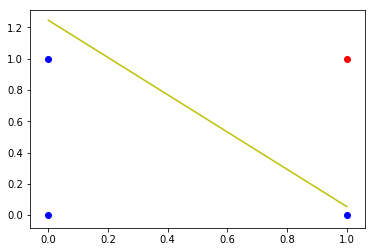

Erro no treino: 0.00
Número de iterações: 6


In [84]:
perce = Perceptron(verbose=10, random_state=0)
perce.ajustar(X, y)

Implemente um perceptron multiclass!!